In [1]:
from PIL import Image
from PIL import ImageDraw
import numpy as np

In [2]:
def dist(p1,p2):
    dist = np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
    return dist

In [3]:
#assumes the angle opens from p1 with vector <1,0>
#p1 and p2 are tuples (x,y)
def angleBetween(p1,p2, degrees = False):
    if degrees == True:
        if (p2[1] >= p1[1]):
            theta = np.arccos((p2[0]-p1[0])/dist(p1,p2))*180/np.pi
        else:
            theta = 360 - np.arccos((p2[0]-p1[0])/dist(p1,p2))*180/np.pi
    else:
        if (p2[1] >= p1[1]):
            theta = np.arccos((p2[0]-p1[0])/dist(p1,p2))
        else:
            theta = 2*np.pi - np.arccos((p2[0]-p1[0])/dist(p1,p2))
    return theta

In [4]:
p1 = (0,0)
p2 = (1,-1)
angleBetween(p1,p2)

5.497787143782138

In [5]:
## Find the endpoint of a line segment with given start coordinate (x,y), angle (in radians) and distance
### returns endpoint 
def line_segment_endpoint(coord, angle, dist, degrees = False):
    if degrees == True:
        angle = angle * np.pi/180
        return (dist*np.cos(angle) + coord[0], dist*np.sin(angle) + coord[1])
    else:
        return (dist*np.cos(angle) + coord[0], dist*np.sin(angle) + coord[1])

In [6]:
##p1 and p2 are tuples (x,y)
##angle is given in degrees
##stretch is a float which determines how much longer or shorter the new point will be located from p2, as scaled from dist(p1,p2)
def find_outward_third(p1,p2, angle, stretch):
    
    #get angle between p1 and p2, theta is in degrees
    theta = angleBetween(p1,p2, degrees = True)
    return line_segment_endpoint(p2, theta+angle, dist(p1,p2)*stretch, degrees = True)

In [9]:
p1 = (0,0)
p2 = (1,1)
find_outward_third(p1,p2, 90, 0.75)

(0.25, 1.75)

In [8]:
#Inputs:
#Outputs:

def spiral_out(drawable, ptPairs, angle, stretch, iterations):
    if iterations == 0:
        return "Done"
    newPairs = []
    try:
        for pair in ptPairs:
            p3 = find_outward_third(pair[0],pair[1],angle, stretch)
            #print(p3)
            color = (int(125*np.sin(iterations*np.pi/32)),15,int(125*np.cos(iterations*np.pi/32)), 125)
            #color = (200,200,250)
            drawable.polygon([pair[0],pair[1],p3], color, color)
            newPairs.append((pair[1],p3))
        return spiral_out(drawable, newPairs, angle, stretch, iterations-1)
    except:
        return "Done"

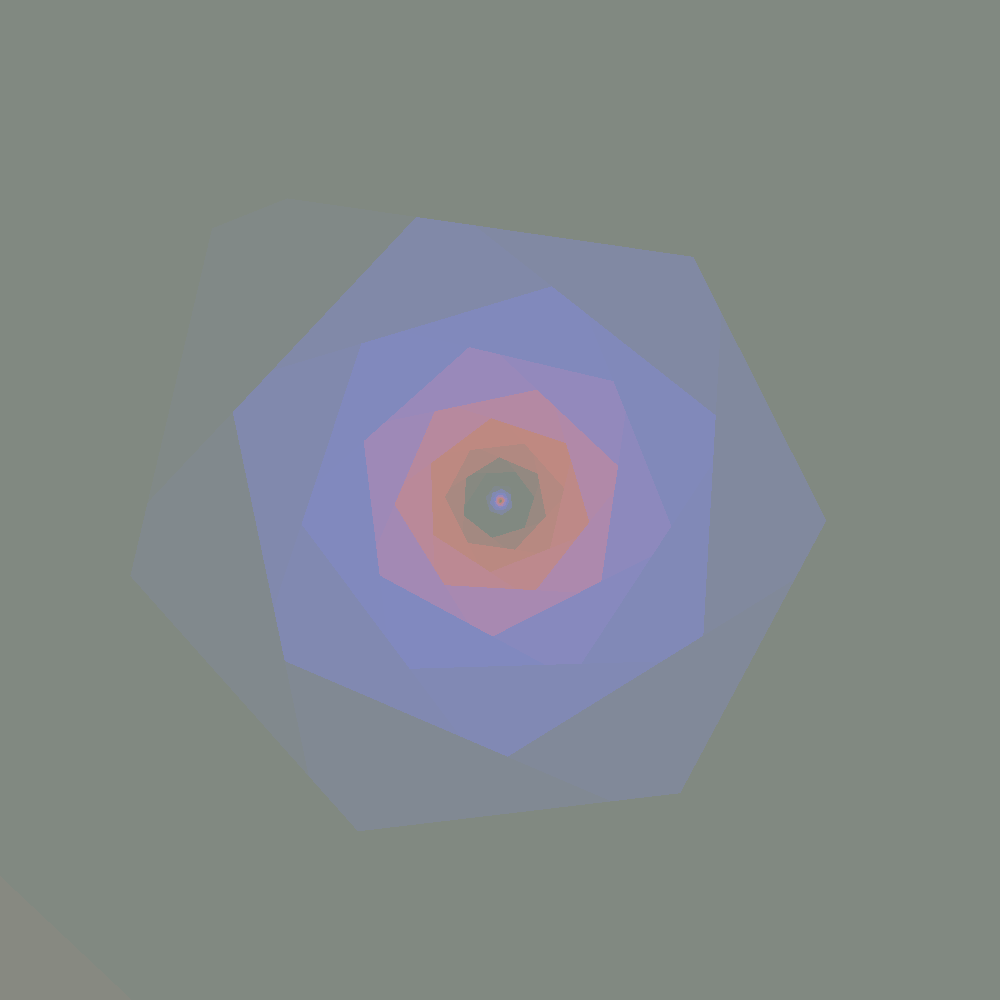

In [9]:
image = Image.new("RGBA", (1000,1000))
draw = ImageDraw.Draw(image)
p1 = (int(image.width/2), int(image.height/2))
p2 = (p1[0]+1, p1[1])
angle = 55
stretch = 1.05
iterations = 300
spiral_out(draw,[(p1,p2)],angle,stretch, iterations)
image

In [163]:
image.save("sprial_out_v1.png")

In [12]:
#Inputs:
#Outputs:

def spiral_out(drawable, ptPairs, angle, stretch, iterations):
    if iterations == 0:
        return "Done"
    newPairs = []
    try:
        for pair in ptPairs:
            p3 = find_outward_third(pair[0],pair[1],angle, stretch)
            
            #Pick a color based on the iteration
            color = (int(125*np.sin(iterations*np.pi/32)),10,int(125*np.sin(5*iterations*np.pi/32)))
            drawable.polygon([pair[0],pair[1],p3], color, color)
            
            if iterations%50 == 0:
                p4 = find_outward_third(pair[0],pair[1],-angle, 0.95)
                newPairs.append((pair[1],p4))
            
            newPairs.append((pair[1],p3))
            #print(newPairs)
        return spiral_out(drawable, newPairs, angle, stretch, iterations-1)
    except:
        return "Done"

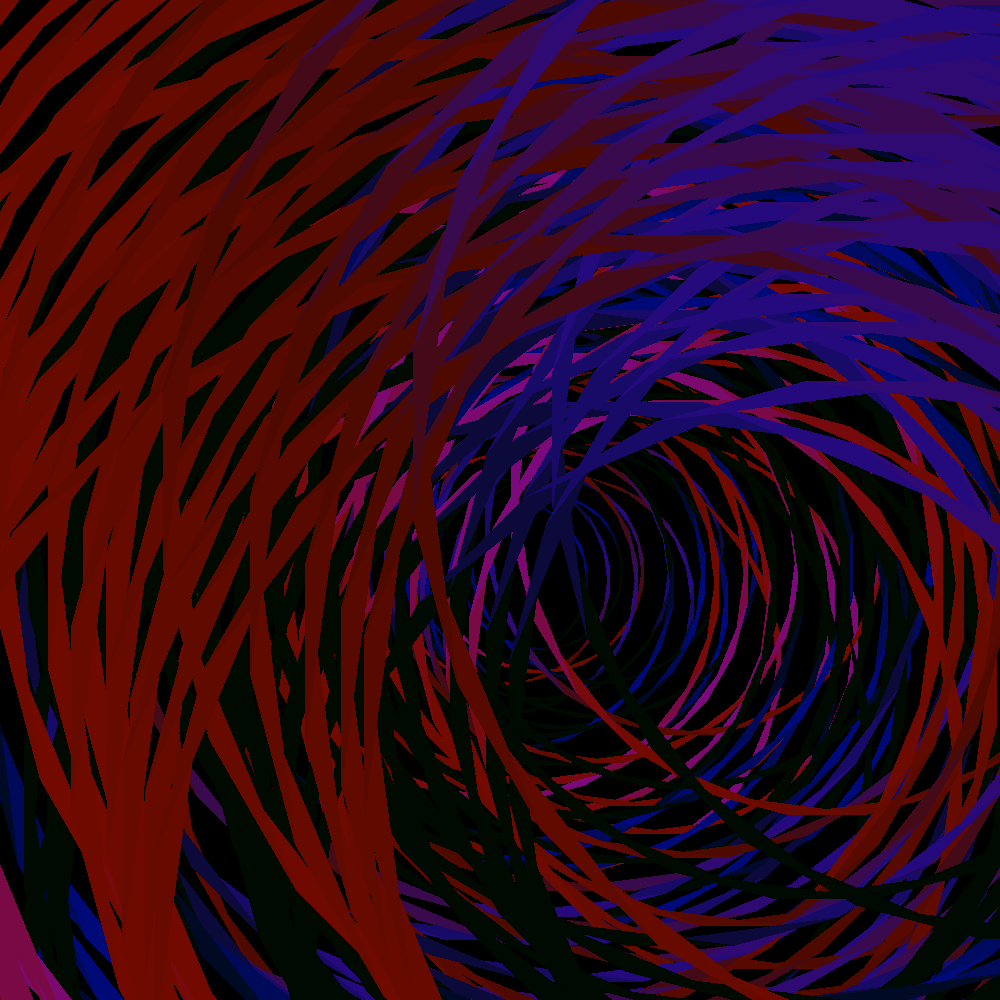

In [18]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
p1 = (int(image.width/2), int(image.height/2))
p2 = (p1[0]+20, p1[1])
angle = 15
stretch = 1.0101
iterations = 250
spiral_out(draw,[(p1,p2)],angle,stretch, iterations)
image

In [19]:
image.save("neat_spiral_what_2.png")

In [39]:
#Inputs:
#Outputs:

def spiral_out(drawable, ptPairs, angle, stretch, iterations):
    if iterations == 0:
        return "Done"
    newPairs = []
    try:
        for pair in ptPairs:
            p3 = find_outward_third(pair[0],pair[1],angle, stretch)
            
            #Pick a color based on the iteration
            color = (int(125*np.sin(iterations*np.pi/32)),10,int(125*np.sin(5*iterations*np.pi/32)))
            #color = (255,255,255)
            drawable.line([pair[1],p3], fill = color, width = 1)
            
            if iterations%100 == 0:
                p4 = find_outward_third(pair[0],pair[1],-angle, stretch)
                drawable.line([pair[1],p3], fill = color, width = 2)
                newPairs.append((pair[1],p4))
            
            newPairs.append((pair[1],p3))
            #print(newPairs)
        return spiral_out(drawable, newPairs, angle, stretch, iterations-1)
    except:
        return "Done"

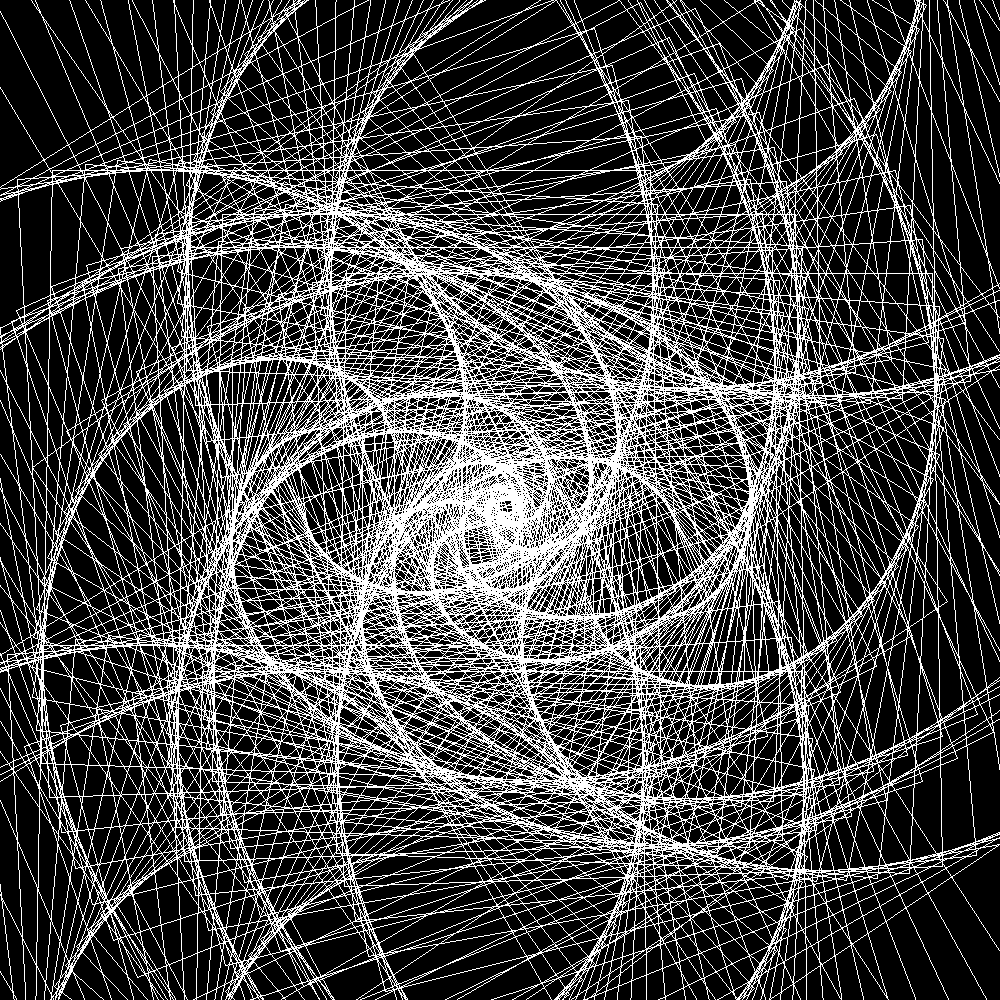

In [62]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
p1 = (int(image.width/2), int(image.height/2))
p2 = (p1[0]+12,p1[1])
angle = 89
stretch = 1.0108
iterations = 399
spiral_out(draw,[(p1,p2)],angle,stretch, iterations)
image

In [63]:
image.save("web_of_hard_light.png")

In [84]:
#Inputs:
#Outputs:

def spiral_out(drawable, ptPairs, angle, stretch, iterations):
    if iterations == 0:
        return "Done"
    newPairs = []
    try:
        for pair in ptPairs:
            p3 = find_outward_third(pair[0],pair[1],angle, stretch)
            
            #Pick a color based on the iteration
            color = (int(50*np.sin(iterations*np.pi/32))+100,10,int(50*np.cos(iterations*np.pi/32))+200)
            #color = (255,255,255)
            drawable.line([pair[1],p3], fill = color, width = max(1,int(iterations/100)))
            
            if iterations%250 == 0:
                p4 = find_outward_third(pair[0],pair[1],-angle, stretch)
                drawable.line([pair[1],p3], fill = color, width = max(1,int(iterations/200)))
                newPairs.append((pair[1],p4))
            
            newPairs.append((pair[1],p3))
            #print(newPairs)
        return spiral_out(drawable, newPairs, angle, stretch, iterations-1)
    except:
        return "Done"

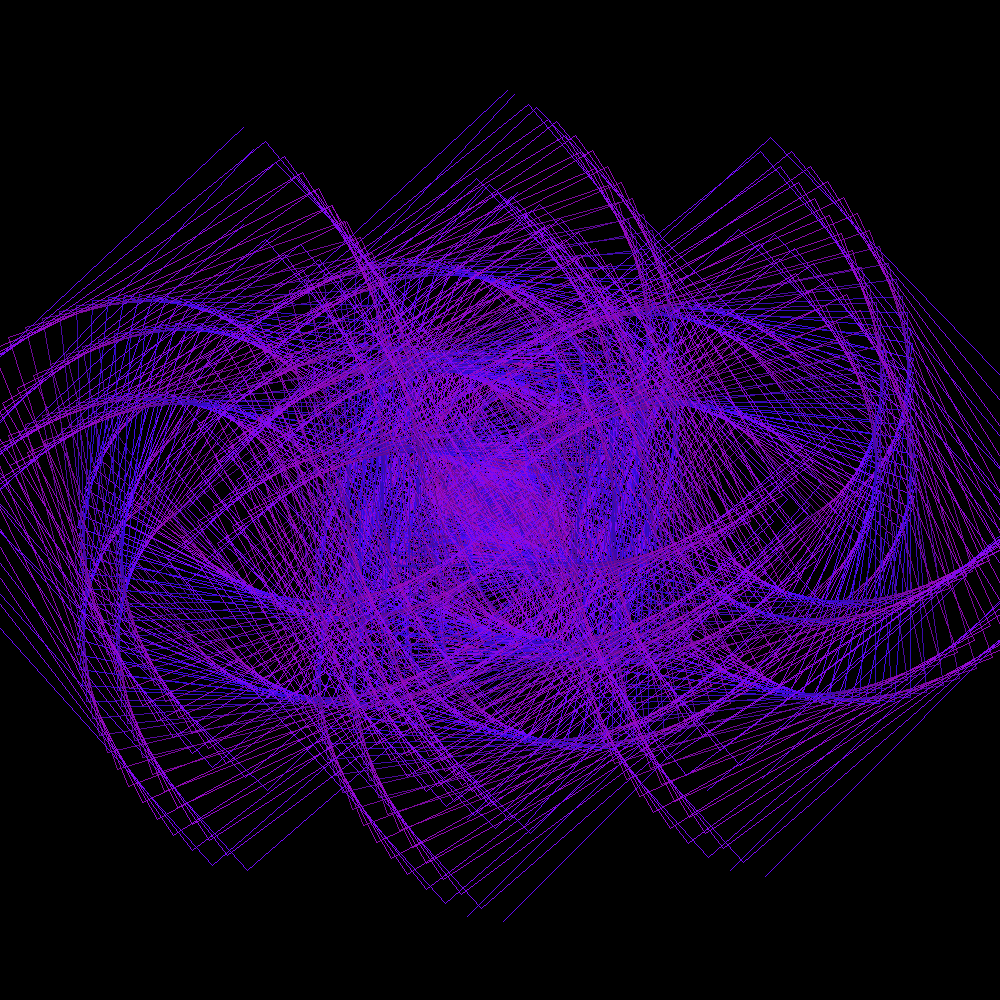

In [98]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
p1 = (int(image.width/2), int(image.height/2))
p2 = (p1[0]+3,p1[1])
angle = 89
stretch = 1.0101
iterations = 499
spiral_out(draw,[(p1,p2)],angle,stretch, iterations)
image

In [99]:
image.save('azatoth_awakens.png')

In [89]:
def spiral_out(drawable, ptPairs, angle, bifur_rate, stretch, iterations, maxIter):
    if iterations == 0:
        return "Done"
    newPairs = []
    try:
        for pair in ptPairs:
            p3 = find_outward_third(pair[0],pair[1],angle, stretch)
            
            #Pick a color based on the iteration
            color = (int(50*np.sin(iterations*np.pi/32))+100,10,int(50*np.cos(iterations*np.pi/32))+200)
            #color = (255,255,255)
            drawable.line([pair[1],p3], fill = color, width = 1)
            
            if iterations%bifur_rate == 0:
                p4 = find_outward_third(pair[0],pair[1],-angle, stretch)
                drawable.line([pair[1],p3], fill = color, width = 1)
                newPairs.append((pair[1],p4))
            
            newPairs.append((pair[1],p3))
            #print(newPairs)
        return spiral_out(drawable, newPairs, angle,bifur_rate, stretch, iterations-1, maxIter)
    except:
        return "Done"

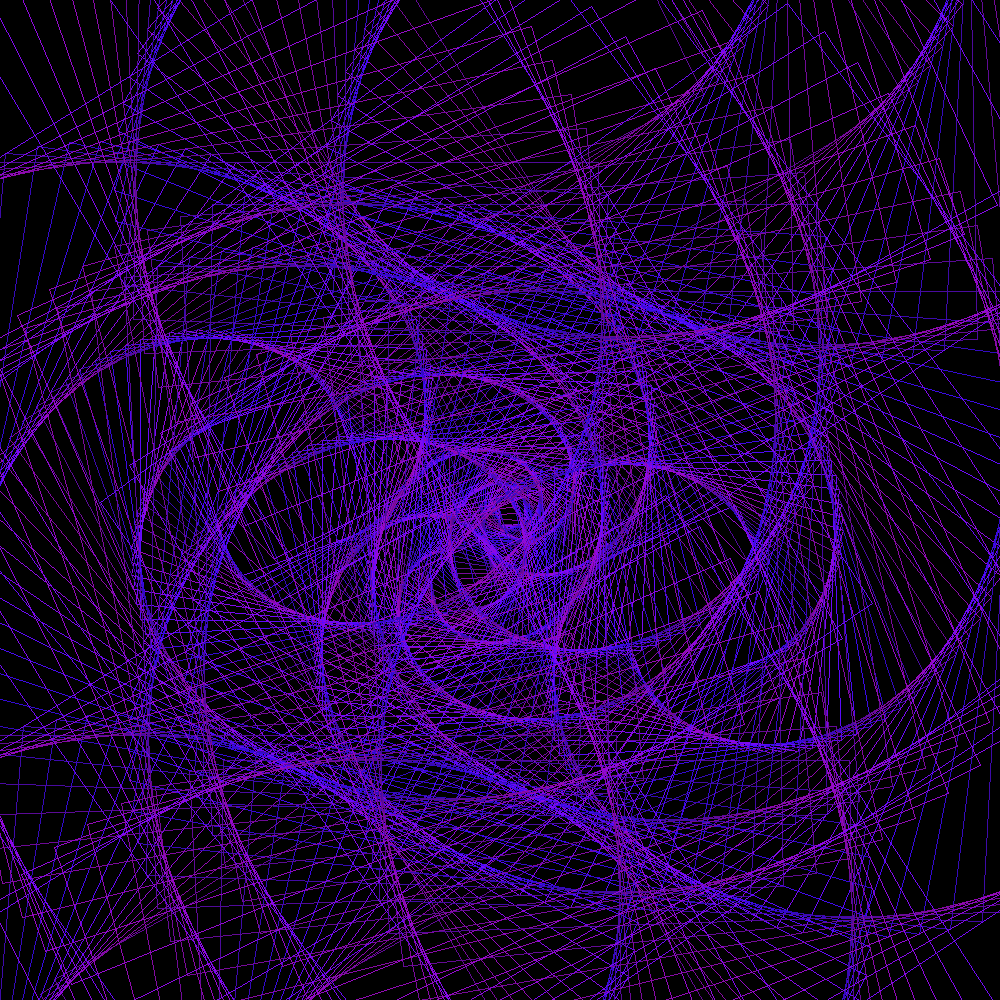

In [90]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
p1 = (int(image.width/2), int(image.height/2))
p2 = (p1[0]+24,p1[1])
angle = 89
stretch = 1.009
bifur_rate = 100
iterations = 4*bifur_rate-1
maxIter = iterations
spiral_out(draw,[(p1,p2)],angle,bifur_rate,stretch, iterations, maxIter)
image

In [134]:
image.save("surfing_the_web.png")

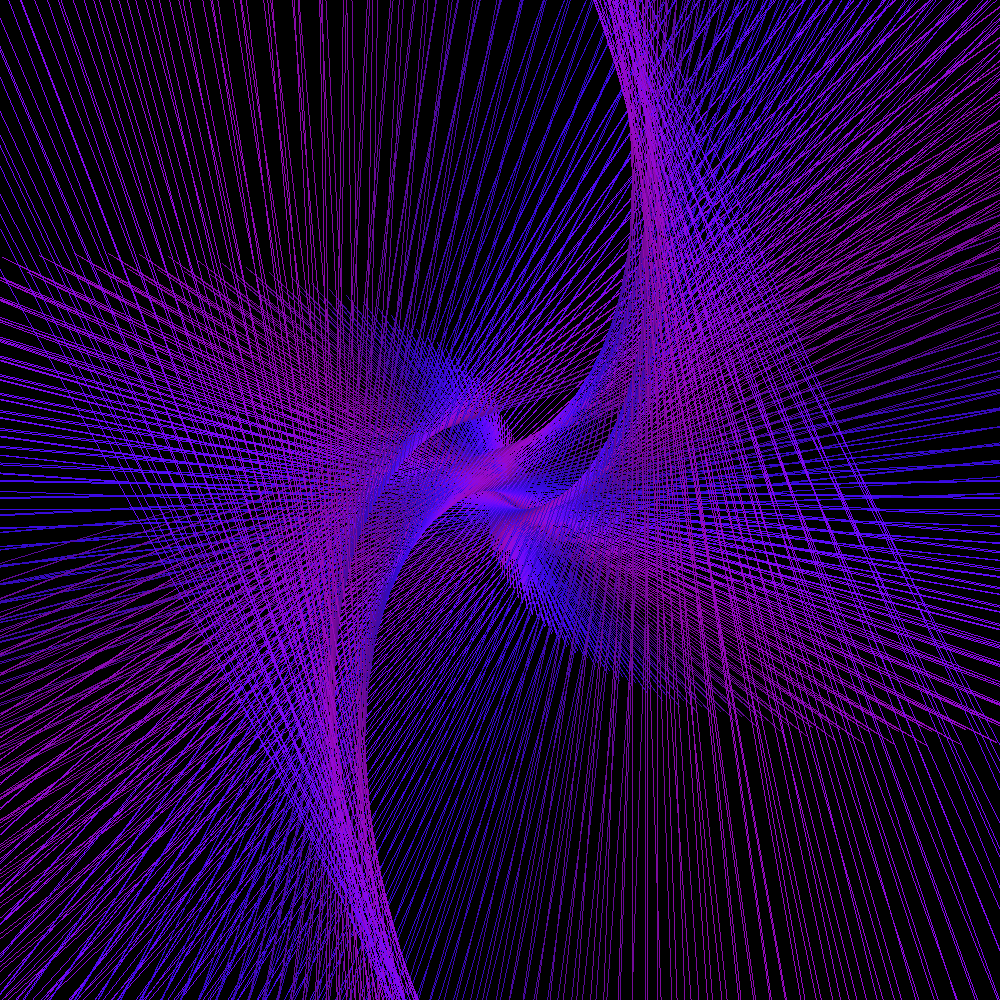

In [83]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
p1 = (int(image.width/2), int(image.height/2))
p2 = (p1[0]+11,p1[1])
angle = 179
stretch = 1.03
bifur_rate = 100
iterations = 3*bifur_rate-1
maxIter = iterations
spiral_out(draw,[(p1,p2)],angle,bifur_rate,stretch, iterations, maxIter)
image

In [84]:
image.save("179_100_3_start11.png")

In [109]:
def spiral_out(drawable, ptPairs, angle, bifur_rate, stretch, iterations, maxIter, maxWidth):
    if iterations == 0:
        return "Done"
    newPairs = []
    try:
        for pair in ptPairs:
            p3 = find_outward_third(pair[0],pair[1],angle, stretch)
            
            #Pick a color based on the iteration
            color = (int(50*np.sin(iterations*np.pi/32))+100,10,int(50*np.cos(iterations*np.pi/32))+200)
            #color = (255,255,255)
            drawable.line([pair[1],p3], fill = color, width = max(1,int(((maxIter-iterations)/maxIter)*maxWidth)))
            
            if iterations%bifur_rate == 0:
                p4 = find_outward_third(pair[0],pair[1],-angle, stretch)
                drawable.line([pair[1],p3], fill = color, width = max(1,int(((maxIter-iterations)/maxIter)*maxWidth)))
                newPairs.append((pair[1],p4))
            
            newPairs.append((pair[1],p3))
            #print(newPairs)
        return spiral_out(drawable, newPairs, angle,bifur_rate, stretch, iterations-1, maxIter, maxWidth)
    except:
        return "Done"

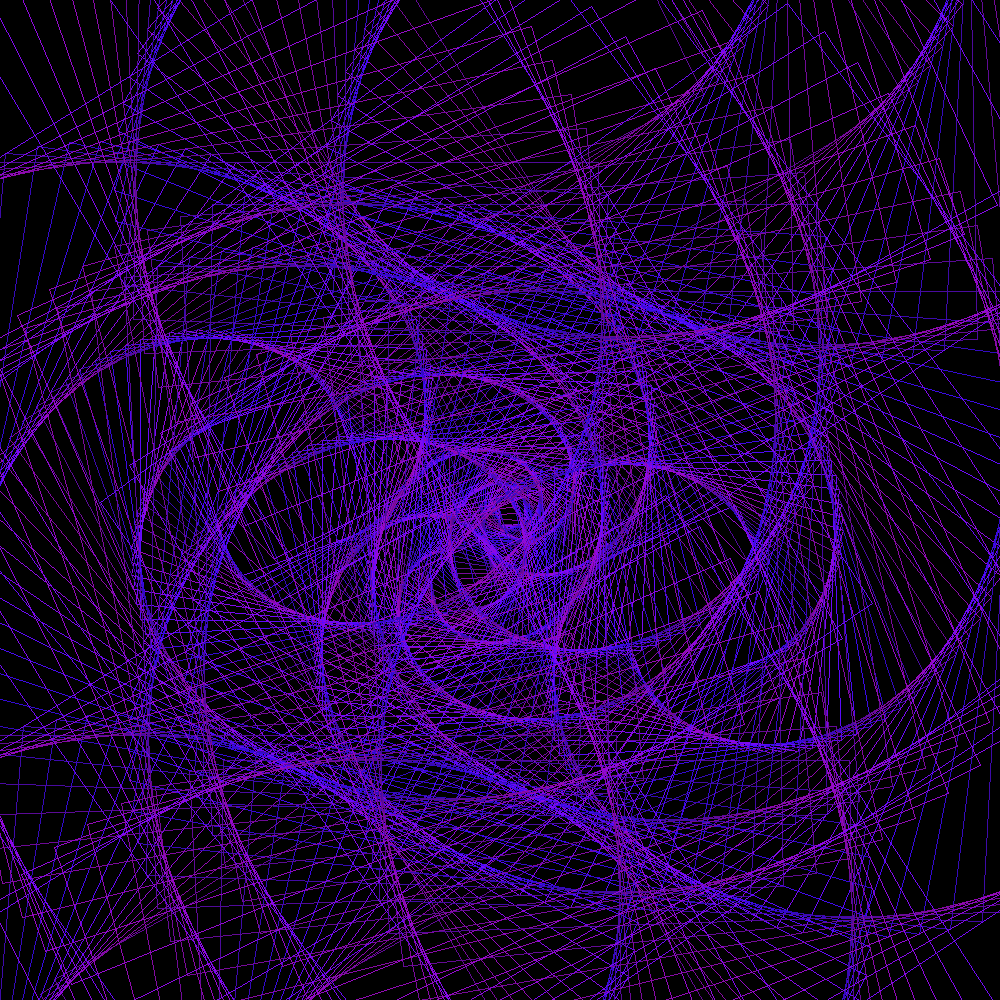

In [110]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
p1 = (int(image.width/2), int(image.height/2))
p2 = (p1[0]+24,p1[1])
angle = 89
stretch = 1.009
bifur_rate = 100
iterations = 4*bifur_rate-1
maxIter = iterations
maxWidth = 2
spiral_out(draw,[(p1,p2)],angle,bifur_rate,stretch, iterations, maxIter, maxWidth)
image

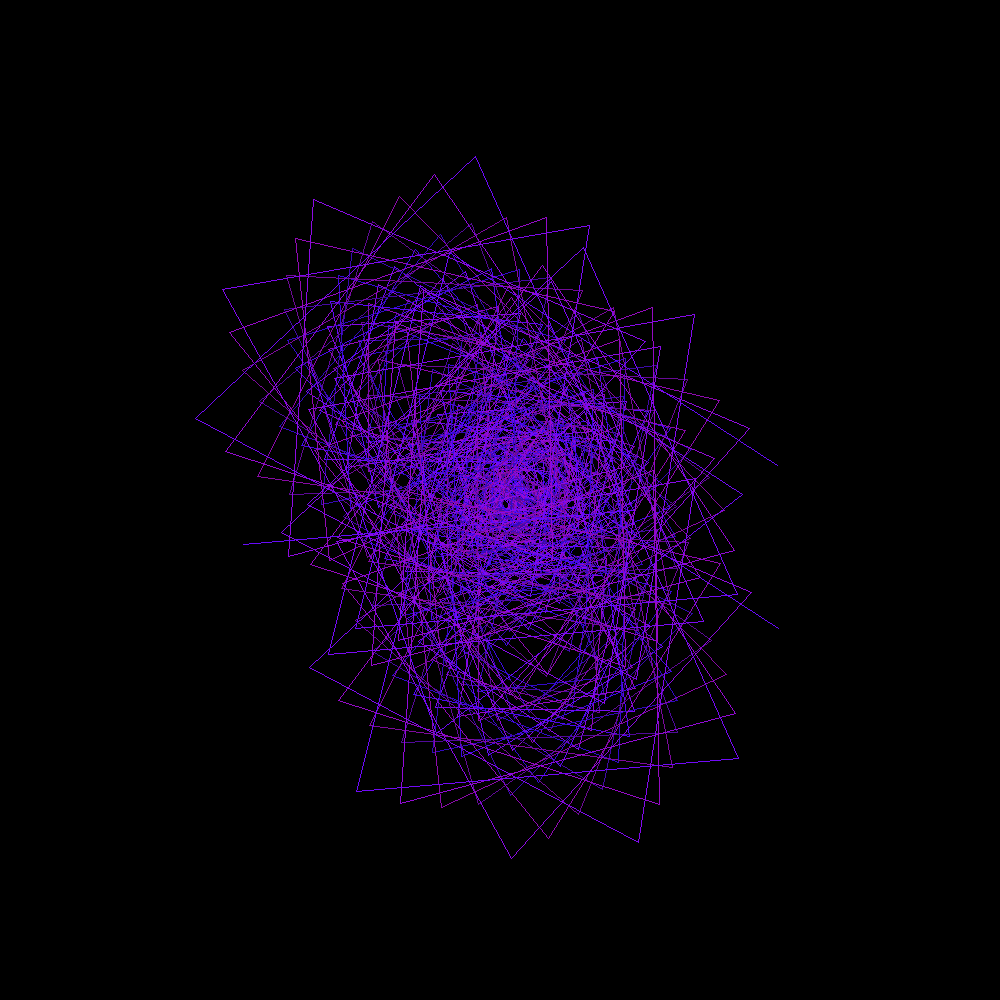

In [106]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
p1 = (int(image.width/2), int(image.height/2))
p2 = (p1[0]+11,p1[1])
angle = 109
stretch = 1.01
bifur_rate = 120
iterations = 3*bifur_rate-1
maxIter = iterations
maxWidth = 2
spiral_out(draw,[(p1,p2)],angle,bifur_rate,stretch, iterations, maxIter, maxWidth)
image